In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score,roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns



# Load the dataset
df = pd.read_csv('diabetes.csv')

# Display the first few rows of the dataset
print(df.head())


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [2]:
# Display basic statistics of the dataset
print(df.describe())

# Check for missing values
print(df.isnull().sum())

# Check the distribution of the 'Outcome' variable
print(df['Outcome'].value_counts())


       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

In [3]:

# Split the dataset into features (X) and target (y)
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [4]:


# Create decision tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Fit the model on the training data
clf.fit(X_train, y_train)

# Predict on the testing data
y_pred = clf.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.7012987012987013

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.71      0.76       151
           1       0.56      0.69      0.61        80

    accuracy                           0.70       231
   macro avg       0.68      0.70      0.69       231
weighted avg       0.72      0.70      0.71       231


Confusion Matrix:
 [[107  44]
 [ 25  55]]


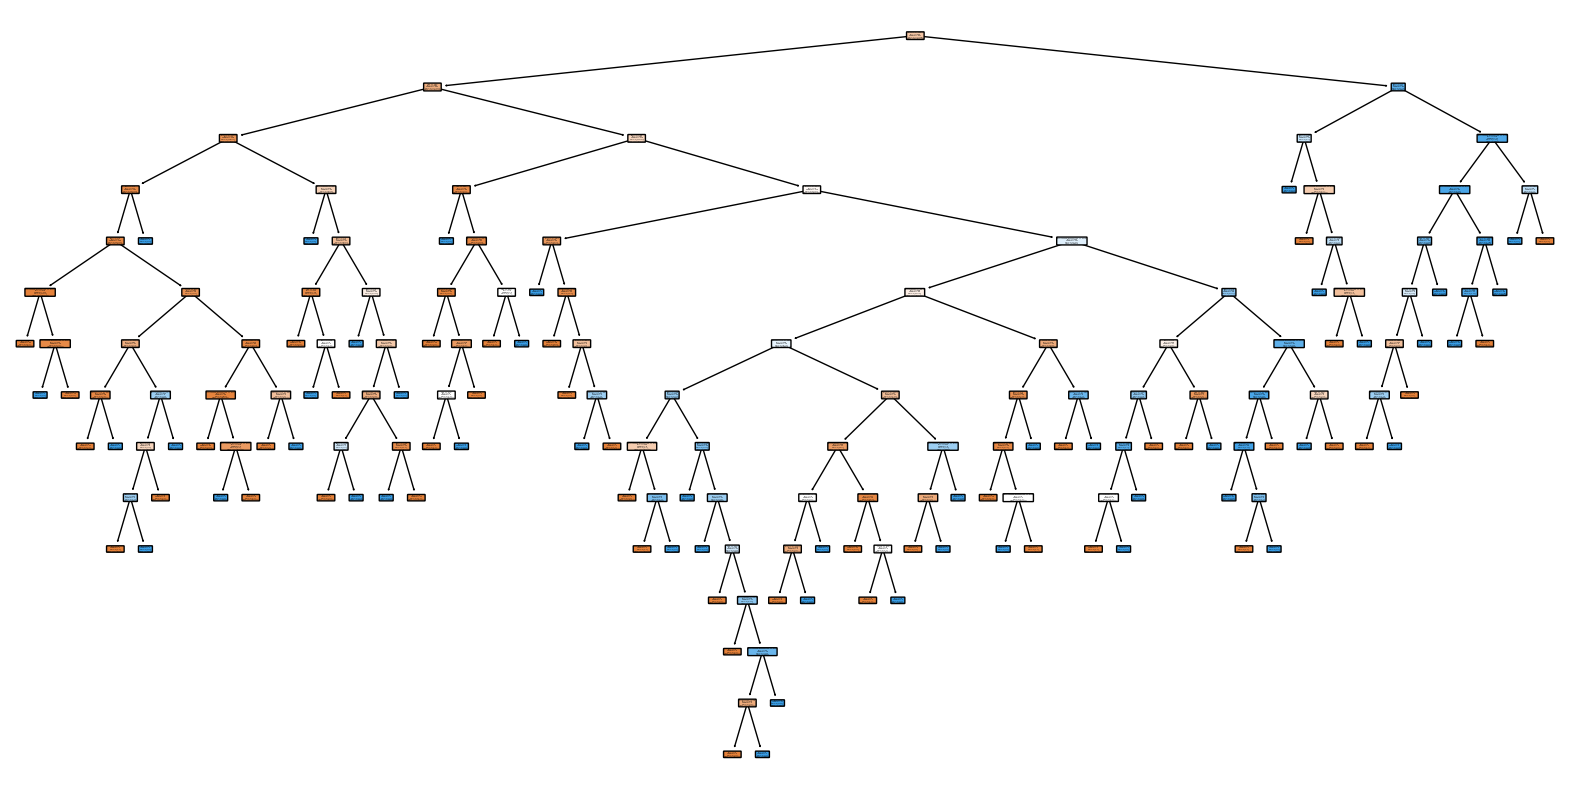

In [5]:
plt.figure(figsize=(20,10))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=['Non-diabetic', 'Diabetic'], rounded=True)
plt.show()


Q1. Import the dataset and examine the variables. Use descriptive statistics and visualizations to
understand the distribution and relationships between the variables.

In [6]:
# Display basic statistics of the dataset
print(df.describe())


       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

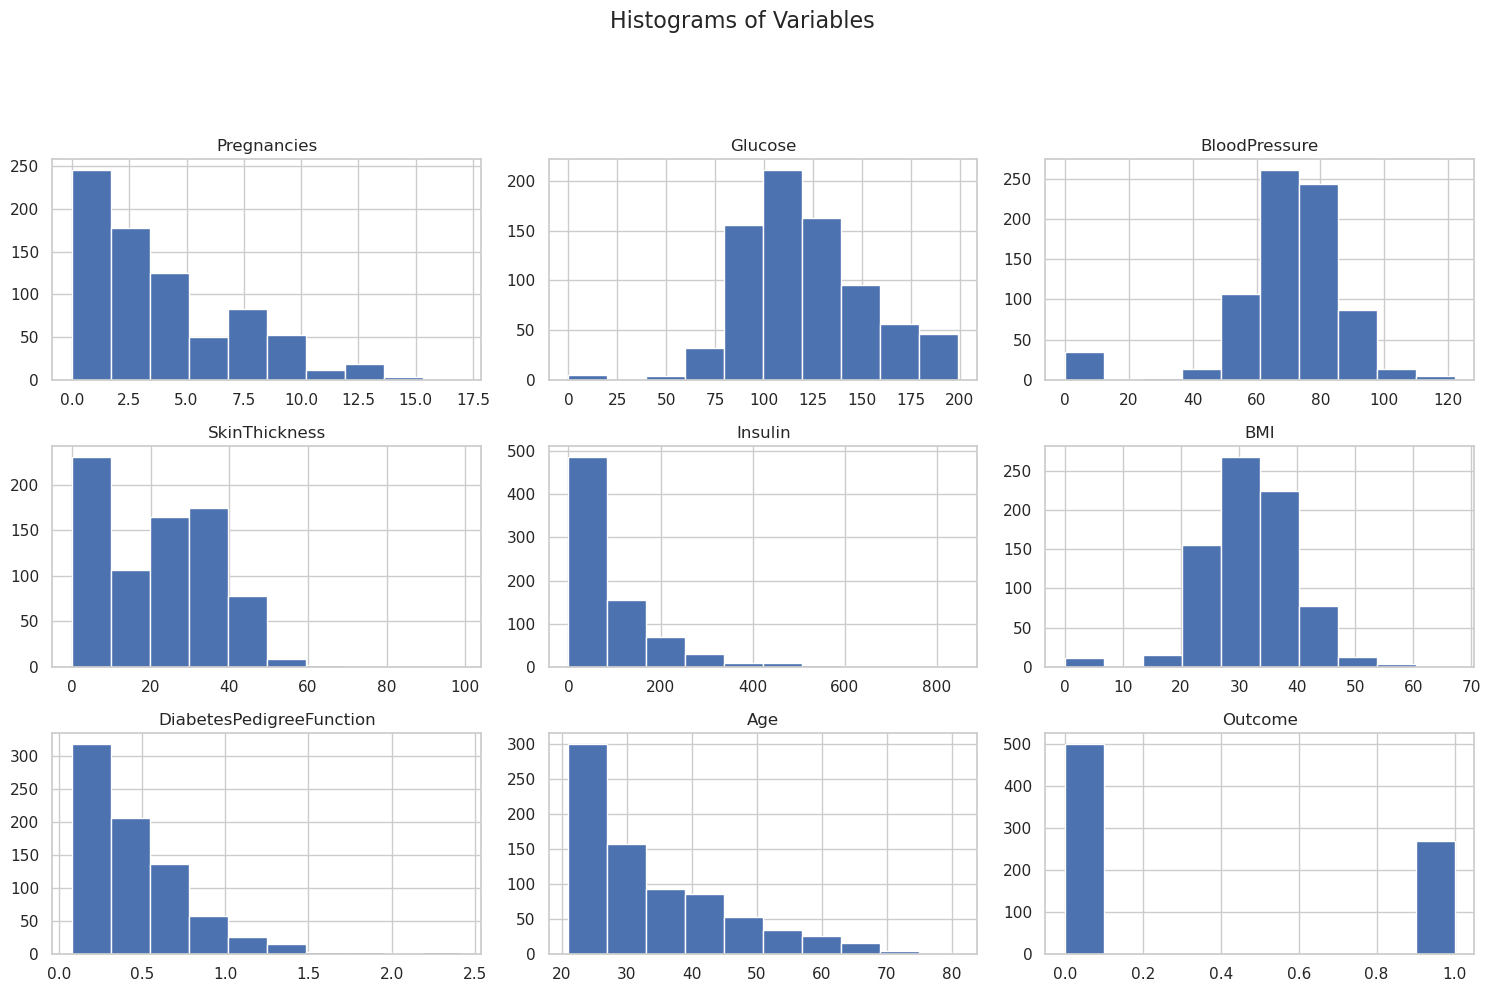

In [7]:


# Set the style for the visualizations
sns.set(style="whitegrid")

# Plot histograms for each variable
df.hist(figsize=(15, 10))
plt.suptitle('Histograms of Variables', y=1.02, fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


Q2. Preprocess the data by cleaning missing values, removing outliers, and transforming categorical
variables into dummy variables if necessary.

In [8]:
# Check for missing values
print(df.isnull().sum())

# Fill missing values with median (for numerical variables)
df.fillna(df.median(), inplace=True)

# Define a function to remove outliers using IQR method
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# Remove outliers from numerical variables
numerical_columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

for column in numerical_columns:
    df = remove_outliers(df, column)



Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [9]:
# Display basic statistics of the cleaned dataset
print(df.describe())

# Check for missing values again
print(df.isnull().sum())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   636.000000  636.000000     636.000000     636.000000  636.000000   
mean      3.786164  118.869497      72.007862      20.745283   69.017296   
std       3.251388   28.996773      11.301102      15.231688   83.601857   
min       0.000000   44.000000      38.000000       0.000000    0.000000   
25%       1.000000   99.000000      64.000000       0.000000    0.000000   
50%       3.000000  114.000000      72.000000      23.000000   42.500000   
75%       6.000000  136.250000      80.000000      32.000000  122.000000   
max      13.000000  198.000000     106.000000      60.000000  330.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  636.000000                636.000000  636.000000  636.000000  
mean    31.964151                  0.426237   32.555031    0.309748  
std      6.384132                  0.245088   10.879807    0.462754  
min     18.200000                  

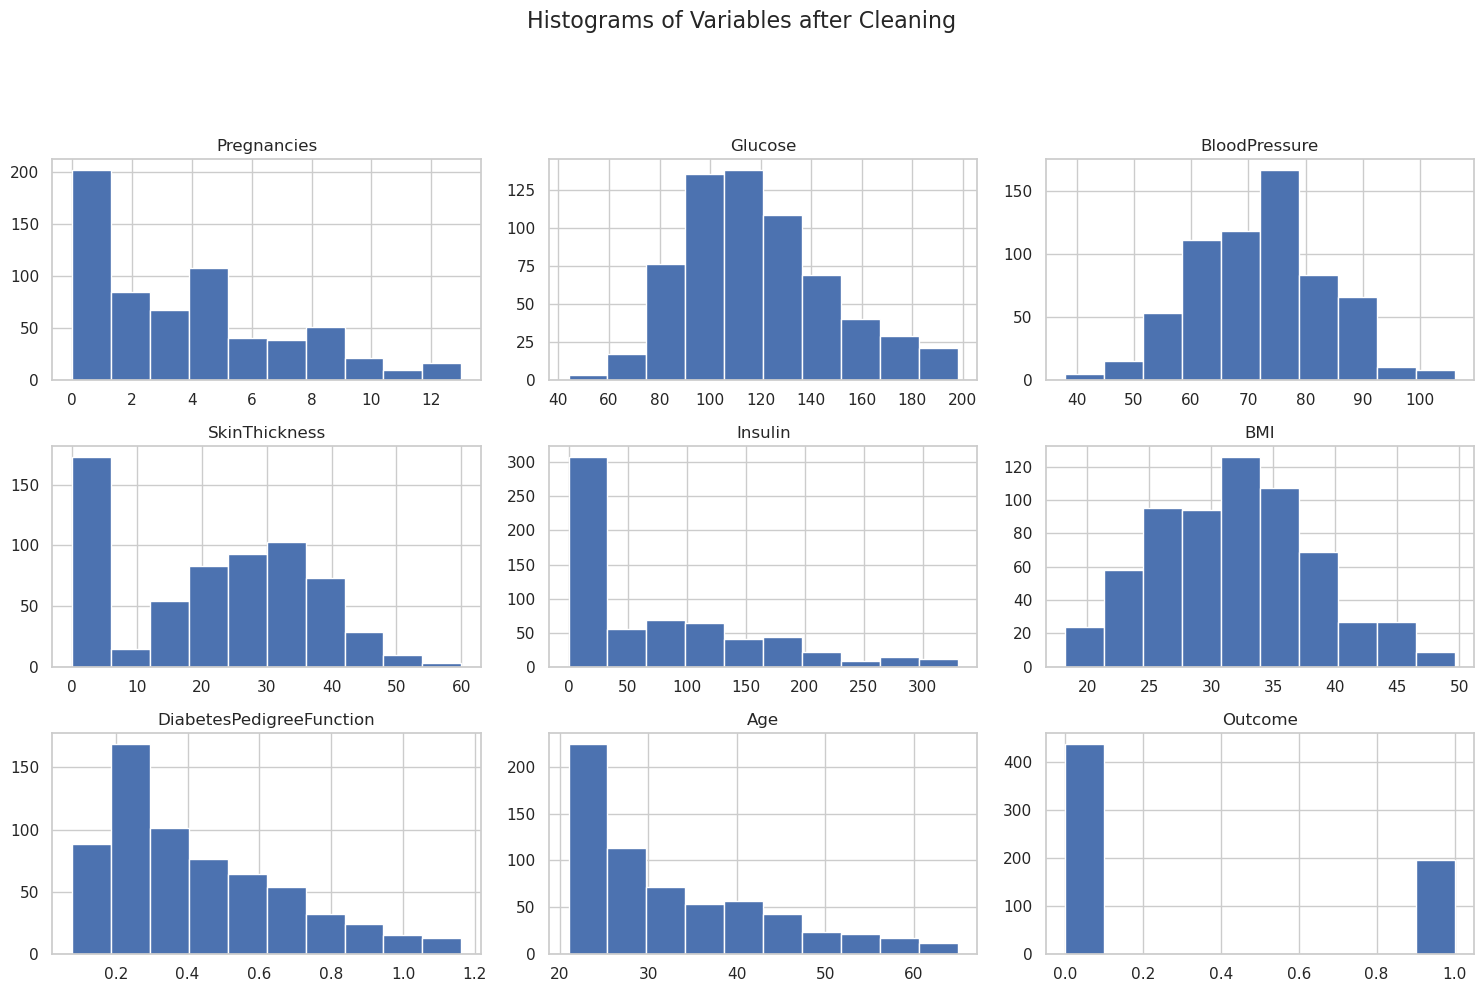

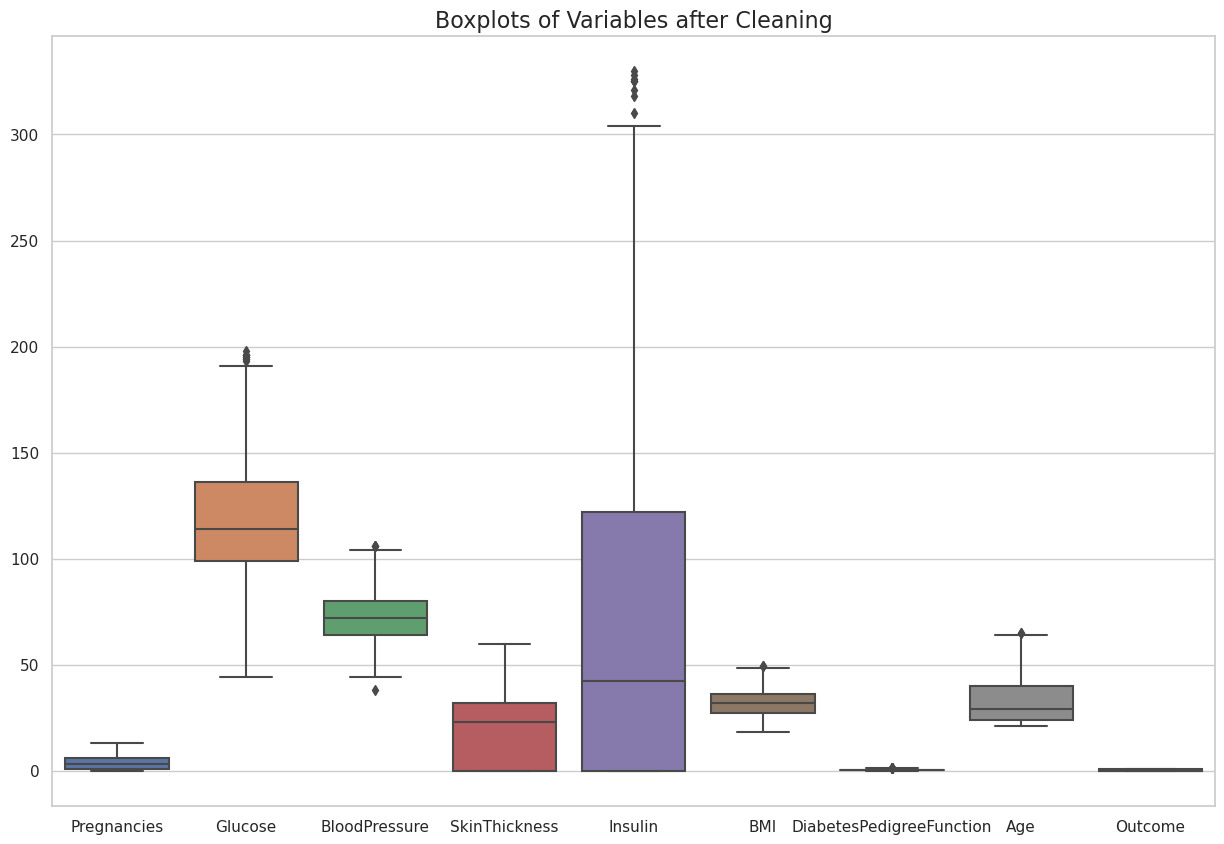

In [10]:
# Plot histograms for each variable after cleaning
df.hist(figsize=(15, 10))
plt.suptitle('Histograms of Variables after Cleaning', y=1.02, fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Plot boxplots for each variable after cleaning
plt.figure(figsize=(15, 10))
sns.boxplot(data=df)
plt.title('Boxplots of Variables after Cleaning', fontsize=16)
plt.show()

Q3. Split the dataset into a training set and a test set. Use a random seed to ensure reproducibility.

In [11]:


# Split the dataset into features (X) and target (y)
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Display the shape of the training and testing sets
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (445, 8)
Shape of y_train: (445,)
Shape of X_test: (191, 8)
Shape of y_test: (191,)


Q4. Use a decision tree algorithm, such as ID3 or C4.5, to train a decision tree model on the training set. Use
cross-validation to optimize the hyperparameters and avoid overfitting.

In [12]:
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.model_selection import train_test_split

# Initialize Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# Define the hyperparameters grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}


# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV on the training data
grid_search.fit(X_train, y_train)


# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_clf = grid_search.best_estimator_

# Perform cross-validation
cv_scores = cross_val_score(best_clf, X_train, y_train, cv=5, scoring='accuracy')

# Calculate the mean and standard deviation of the cross-validation scores
print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())
print("Standard Deviation of CV Accuracy:", cv_scores.std())


# Fit the best model on the entire training data
best_clf.fit(X_train, y_train)


Best Hyperparameters: {'criterion': 'gini', 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 10}
Cross-Validation Accuracy Scores: [0.80898876 0.82022472 0.79775281 0.76404494 0.71910112]
Mean CV Accuracy: 0.7820224719101123
Standard Deviation of CV Accuracy: 0.03665057624786538


DecisionTreeClassifier(max_depth=10, max_features='log2', min_samples_split=10,
                       random_state=42)

Q5. Evaluate the performance of the decision tree model on the test set using metrics such as accuracy,
precision, recall, and F1 score. Use confusion matrices and ROC curves to visualize the results.

In [13]:

# Predict on the test set
y_pred = best_clf.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')


precision = precision_score(y_test, y_pred)
print(f'Precision: {precision:.4f}')


recall = recall_score(y_test, y_pred)
print(f'Recall: {recall:.4f}')


f1 = f1_score(y_test, y_pred)
print(f'F1 Score: {f1:.4f}')




Accuracy: 0.6649
Precision: 0.4203
Recall: 0.5472
F1 Score: 0.4754


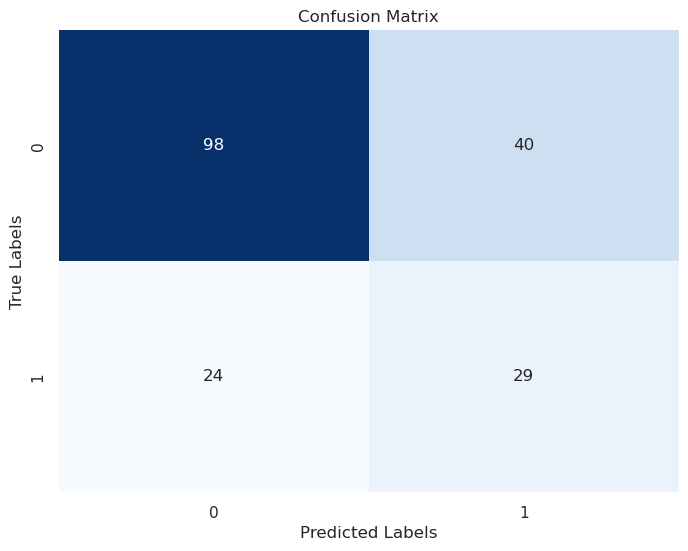

In [14]:
# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


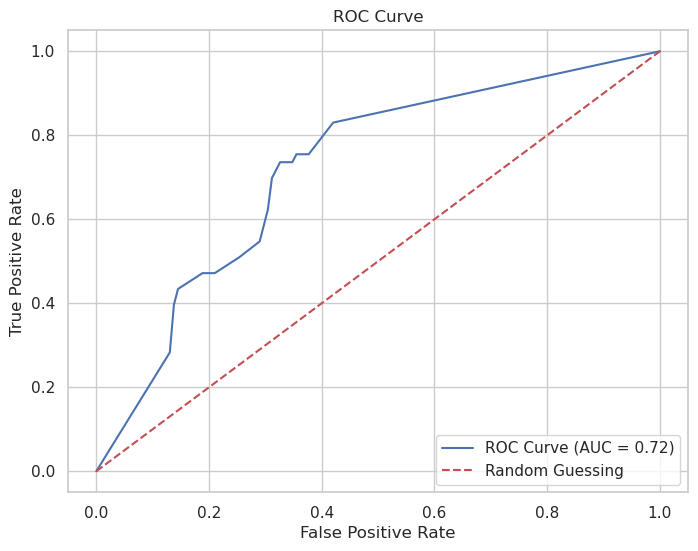

In [15]:
# Calculate ROC curve and AUC
y_pred_prob = best_clf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'r--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


In [16]:
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC AUC: {roc_auc:.4f}')


Accuracy: 0.6649
Precision: 0.4203
Recall: 0.5472
F1 Score: 0.4754
ROC AUC: 0.7207


Q6. Interpret the decision tree by examining the splits, branches, and leaves. Identify the most important
variables and their thresholds. Use domain knowledge and common sense to explain the patterns and
trends.

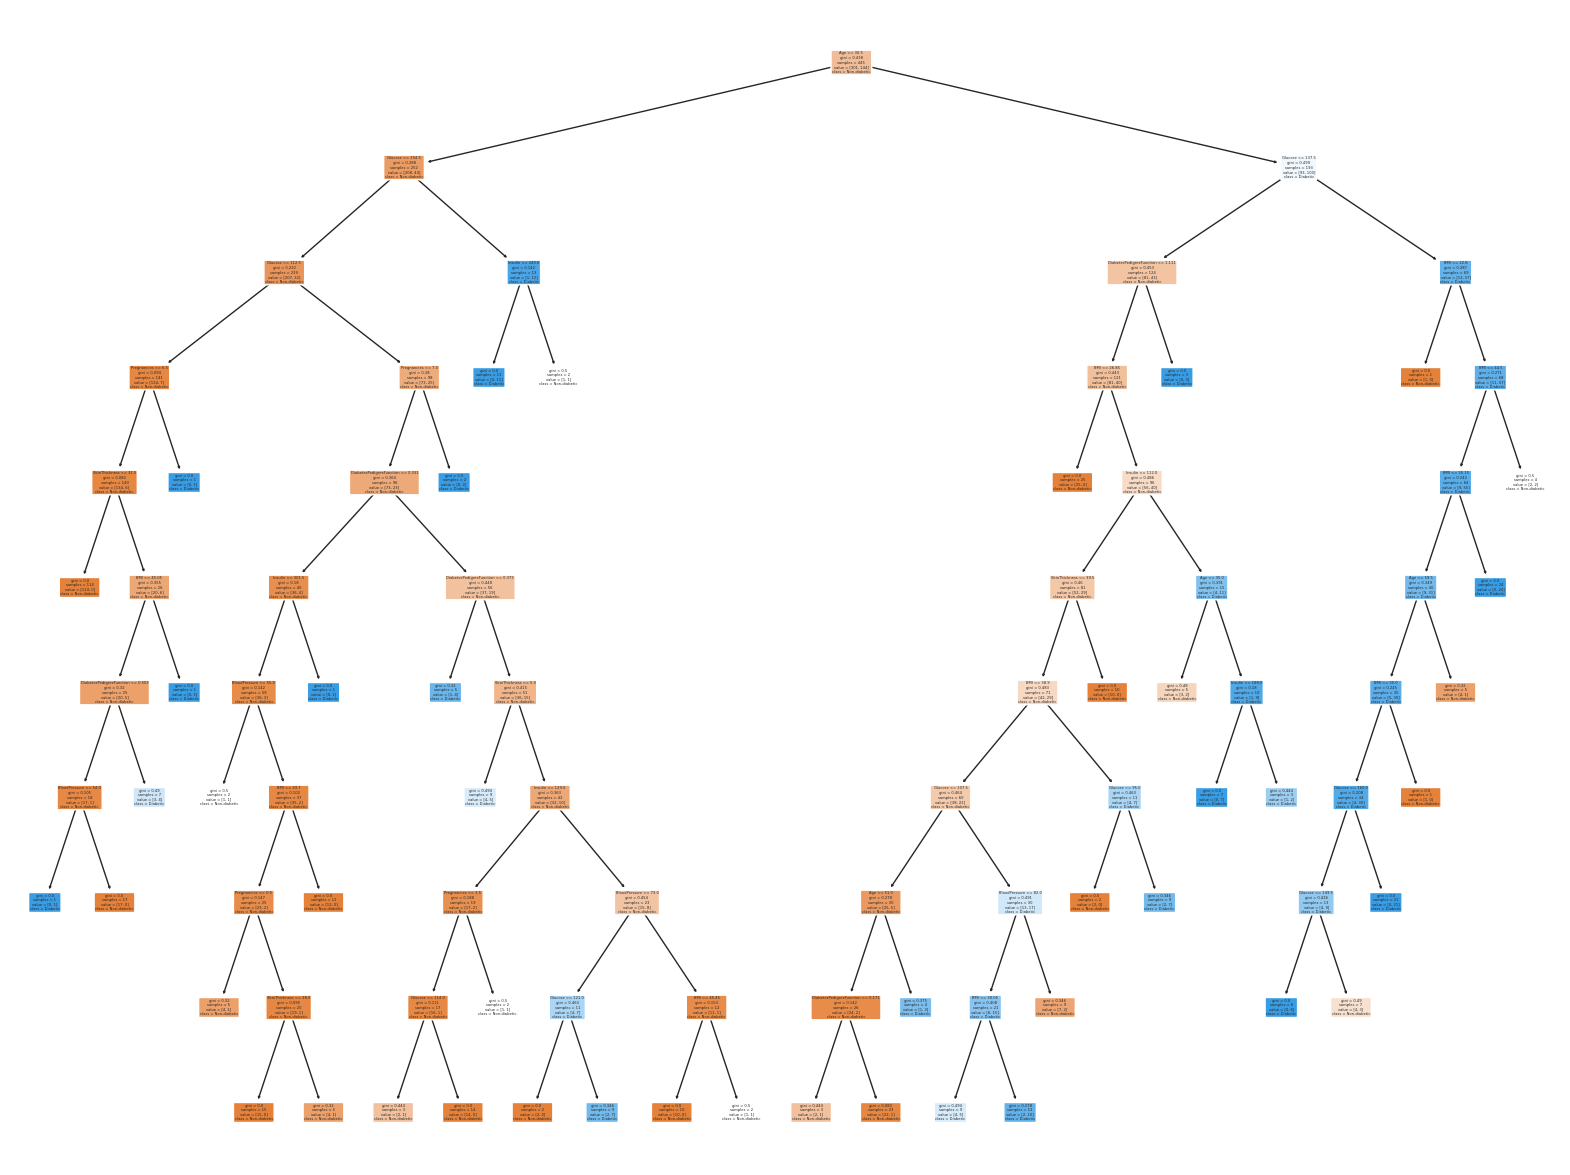

In [17]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 15))
plot_tree(best_clf, feature_names=X.columns, class_names=['Non-diabetic', 'Diabetic'], filled=True, rounded=True)
plt.show()


Interpreting the Decision Tree
Important Variables and Thresholds
By examining the decision tree, you can identify the most important variables and their corresponding thresholds. Look for nodes (splits) that appear near the top of the tree or multiple times throughout the tree, as these indicate important features.

For example:

Glucose appears as the first split, indicating it's a significant predictor for diabetes. The threshold for glucose might be around 120-130 mg/dL, where values greater than this threshold might lead to one branch, and values below might lead to another.
BMI and Age also seem to be important variables, with their respective thresholds determining the splits.
Interpretation with Domain Knowledge and Common Sense
Glucose: High glucose levels are a known risk factor for diabetes. The decision tree's split on glucose levels aligns with medical understanding.

BMI (Body Mass Index): Higher BMI is associated with increased risk of diabetes. The split on BMI suggests that the model is identifying higher BMI values as a significant predictor of diabetes.

Age: Age is another risk factor for diabetes, as the likelihood of developing diabetes increases with age. The split on age might identify a threshold where older age groups are at a higher risk.

Other Variables: Variables like Pregnancies, BloodPressure, SkinThickness, Insulin, and DiabetesPedigreeFunction might have been used for further refining the splits in the tree, but they may not be as influential as the aforementioned variables based on their positions in the tree.

Q7. Validate the decision tree model by applying it to new data or testing its robustness to changes in the
dataset or the environment. Use sensitivity analysis and scenario testing to explore the uncertainty and
risks.

Sensitivity Analysis
Sensitivity analysis involves assessing how changes in input variables affect the model's predictions. We can perturb the input features within a certain range and observe how sensitive the model's predictions are to these changes.

Let's perform sensitivity analysis by perturbing one of the important variables, like Glucose, within a small range and observing the change in predictions.

In [18]:
# Copy the test set to avoid modifying the original data
X_test_sensitivity = X_test.copy()

# Perturb the 'Glucose' values by adding a small noise
noise = 5  # you can adjust the noise level
X_test_sensitivity['Glucose'] += noise

# Predict on the perturbed data
y_pred_sensitivity = best_clf.predict(X_test_sensitivity)

# Compare the original and perturbed predictions
sensitivity_accuracy = accuracy_score(y_test, y_pred_sensitivity)
print(f'Accuracy after Sensitivity Analysis: {sensitivity_accuracy:.4f}')


Accuracy after Sensitivity Analysis: 0.6597


Scenario Testing
Scenario testing involves evaluating the model's performance under different scenarios or conditions that might occur in real-world applications.

Let's create a few scenarios and test the model's predictions:

Scenario 1: All features remain the same, but the patient is older.
Scenario 2: Glucose level is high, but other features are within normal range.
Scenario 3: BMI is high, but Glucose level is normal.
Scenario 4: All features are at extreme values.

In [19]:
# Create scenarios
scenarios = {
    'Scenario 1': X_test.copy(),
    'Scenario 2': X_test.copy(),
    'Scenario 3': X_test.copy(),
    'Scenario 4': X_test.copy()
}

# Scenario 1: Increase Age
scenarios['Scenario 1']['Age'] += 10

# Scenario 2: Increase Glucose
scenarios['Scenario 2']['Glucose'] += 50

# Scenario 3: Increase BMI
scenarios['Scenario 3']['BMI'] += 10

# Scenario 4: Extreme values
scenarios['Scenario 4'] = scenarios['Scenario 4'].apply(lambda x: x + 3 * x.std())

# Predict on scenarios
scenario_predictions = {scenario: best_clf.predict(scenarios[scenario]) for scenario in scenarios}

# Print scenario predictions
for scenario, predictions in scenario_predictions.items():
    print(f'{scenario} Predictions:')
    print(predictions)
    print('-' * 40)


Scenario 1 Predictions:
[0 1 0 1 1 0 0 0 0 1 1 0 1 1 0 1 0 1 0 1 1 1 0 1 1 0 0 1 1 0 0 0 1 0 1 1 0
 1 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 1 0 0 1 1 0 1 1
 0 0 0 1 1 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 1 0 0 1 1 1 1 1 0 0 0 1 0 0 1 0 0
 0 1 0 0 0 0 1 0 0 0 1 0 1 1 1 0 0 0 1 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 1 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 1 0 1 0 0 0 1 1 1 1
 0 1 0 0 1 1]
----------------------------------------
Scenario 2 Predictions:
[1 0 1 1 1 1 0 0 0 0 1 1 1 1 0 1 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 0
 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1
 1 0 1 0 1 0 0 1 0 1 1 0 1 0 0 1 1 0 1 1 1 1 1 0 1 1 1 1 0 0 0 1 0 1 1 1 0
 1 1 1 0 0 1 1 0 0 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1 1 0 0 1 0 0 0 1 1 0 1 0 0
 1 1 1 1 1 1 1 0 1 0 1 1 0 0 1 1 1 0 0 0 0 1 0 0 1 0 1 1 1 1 1 1 0 1 1 1 1
 0 1 0 1 1 1]
----------------------------------------
Scenario 3 Predictions:
[1 1 0 1 1 0 0 0 0 1 1 1 1 0 0 1 0 1 0 0 1 1 1 1 1 0 0 1 1 1 1 0 1 0